Epoch 1/300
10/10 - 2s - loss: 0.0411
Epoch 2/300
10/10 - 0s - loss: 0.0355
Epoch 3/300
10/10 - 0s - loss: 0.0308
Epoch 4/300
10/10 - 0s - loss: 0.0263
Epoch 5/300
10/10 - 0s - loss: 0.0225
Epoch 6/300
10/10 - 0s - loss: 0.0193
Epoch 7/300
10/10 - 0s - loss: 0.0167
Epoch 8/300
10/10 - 0s - loss: 0.0147
Epoch 9/300
10/10 - 0s - loss: 0.0130
Epoch 10/300
10/10 - 0s - loss: 0.0118
Epoch 11/300
10/10 - 0s - loss: 0.0108
Epoch 12/300
10/10 - 0s - loss: 0.0101
Epoch 13/300
10/10 - 0s - loss: 0.0096
Epoch 14/300
10/10 - 0s - loss: 0.0092
Epoch 15/300
10/10 - 0s - loss: 0.0089
Epoch 16/300
10/10 - 0s - loss: 0.0088
Epoch 17/300
10/10 - 0s - loss: 0.0086
Epoch 18/300
10/10 - 0s - loss: 0.0084
Epoch 19/300
10/10 - 0s - loss: 0.0082
Epoch 20/300
10/10 - 0s - loss: 0.0081
Epoch 21/300
10/10 - 0s - loss: 0.0079
Epoch 22/300
10/10 - 0s - loss: 0.0078
Epoch 23/300
10/10 - 0s - loss: 0.0077
Epoch 24/300
10/10 - 0s - loss: 0.0075
Epoch 25/300
10/10 - 0s - loss: 0.0073
Epoch 26/300
10/10 - 0s - loss: 0.

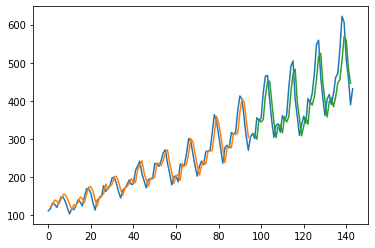

In [36]:
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Activation, Dense
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Dropout
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
#model.add(Dropout(0.2))
#model.add(Dense(units=output_labels))
#model.add(Activation('softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=10, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
